# 02. Neural Network Classfication with PyTorch

classfication is a problem of prediction whether something is one thing or another (there can be multiple things as the options)

https://www.learnpytorch.io/02_pytorch_classification/

## 1. Make clasffication data and get it ready

In [1]:
from sklearn.datasets import  make_circles

# make 1000 samples 
n_samples = 1000

# Create cirles
X, y = make_circles(n_samples, noise=0.03, random_state = 42) 


In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X : \n {X[:5]}")
print(f"First 5 samples of y : \n {y[:5]}")

First 5 samples of X : 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y : 
 [1 1 1 1 0]


In [4]:
# Make dataframe of circle data  
import pandas as pd 

circles = pd.DataFrame({"X1" : X[:,0], "X2": X[:,1], "Label" :y})
circles

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


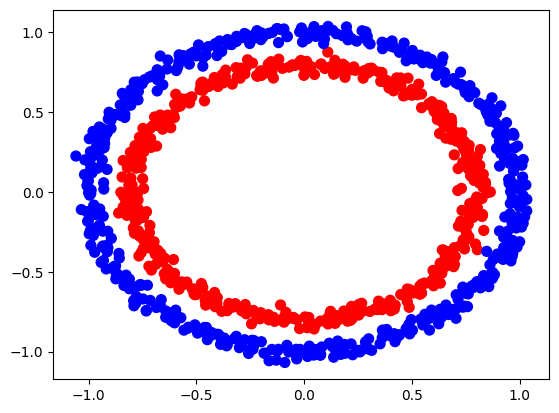

In [5]:
#  Visualize, visuzlize and visualize 
import matplotlib.pyplot as plt 
plt.scatter(x = circles["X1"], y = circles["X2"],  c=circles["Label"], cmap="bwr", s=50)

**Note:** The date we're working with is often refered to as a toy dataset, a dataset that is samll enough to experiment but still sizeable enough to practice the fundamentals. 

### 1.1 Check input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# View the first example of features and labels 
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensor and create train and test splits

In [8]:
# Turn data into tensors
import torch 
torch.__version__

'2.8.0+cu126'

In [9]:
type(X)

numpy.ndarray

In [10]:
# turn data into tensor 
X = torch.from_numpy(X).type(torch.float) 
y = torch.from_numpy(y).type(torch.float) 


X[:5] 

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

In [11]:
type(X)

torch.Tensor

In [12]:
# split data into training and test sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, test_size = 0.2)

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model 

lets' build a model to classify our blue and red dots 

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (By Subclassing `nn.Module`) 
3. Define a loss function and optimizer 
4. Create a training and test loop

In [14]:
import torch 
from torch import nn 

# Make device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [15]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers taht are capable of handling the shapes our data
3. Defines a `forward` method that outlines the forward pass (or forward computation) of the model 
4. Instatiate an instance of our model class and send it to the target `device`

In [16]:
# 1. Construct a model that subclasses nn.Module 
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling the shapes our data 
        self.layer_1 = nn.Linear(in_features = 2, out_features=5) #takes in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features = 5, out_features=1) #takes in 5 features from prev layer and outputs a single feature (same shape as y)
    # 3. Define a forward() method that outlines the forward pass 
    def forward(self,x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
    
# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
next(model_0.parameters())

Parameter containing:
tensor([[-0.6508,  0.2378],
        [ 0.4308, -0.1410],
        [-0.2676,  0.6957],
        [ 0.4406,  0.3470],
        [-0.6617,  0.3885]], device='cuda:0', requires_grad=True)

In [18]:
# Lets  replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features= 5),
    nn.Linear(in_features=5, out_features= 1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6442, -0.4862],
                      [ 0.5350, -0.1846],
                      [-0.5485,  0.6222],
                      [ 0.1591,  0.5505],
                      [ 0.3798, -0.2828]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0598,  0.3946, -0.0073,  0.4891,  0.6186], device='cuda:0')),
             ('1.weight',
              tensor([[-0.3390,  0.0985,  0.3524, -0.2488, -0.0259]], device='cuda:0')),
             ('1.bias', tensor([0.2039], device='cuda:0'))])

In [20]:
# Make predictions 
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions : {len(untrained_preds)}, shape :{untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)} , shape {X_test.shape}")
print(f"\n First 10 predictions\n {untrained_preds[:10]}")
print(f"\n First 10 Labels :\n {y_test[:10]}")

Length of predictions : 200, shape :torch.Size([200, 1])
Length of test samples : 200 , shape torch.Size([200, 2])

 First 10 predictions
 tensor([[ 0.2734],
        [ 0.3500],
        [ 0.0285],
        [ 0.3430],
        [-0.0416],
        [ 0.0057],
        [ 0.2769],
        [ 0.1961],
        [ 0.0318],
        [ 0.3544]], device='cuda:0')

 First 10 Labels :
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer 

which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error)

for classification you might want binary cross entropy or categorical cross entropy  (cross entropy)

as a reminder, the loss function measure how **wrong**  our model 

and for optimizers, two of the most common and useful are SGD and Adam, 

* for the loss function we're going to use `torch.nn.BECWithLogutsLoss()`, for more on what binary cross entropy (BCE) is, check out this article https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a/



In [21]:
# Setup the loss function
# loss_fn = nn.BCELoss # BCELoss = require inputs to have gone through the sigmoid activation function prior to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in 

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1, )

In [22]:
# Calculate accuracy  - out of 100 examples, what percentage dous our model get right? 
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    
    acc = (correct/len(y_pred)) *100
    
    return acc 


## 3. Train Model

to train our model, we're going to need to build a training loop with the following steps:

1. Forward Pass
2. Calculate the loss
3. Optimizer Zero Grad
4. Loss Backward (Backpropagation)
5. Optimizer (Gradient Descent)

### 3.1 Going from raw logits -> Prediction Probalities -> Prediction Labels

Our model outputs are going to be raw **logits**.   

we can convert these **logits** into **predictions probalities** by passing themn to some kind of activation function (e.g sigmoid for binary classfication and softmax for multiclass classfication)

then we can convert our models prediction probalities to **prediction labels** by either rounding them or taking the `argmax`

In [23]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits


tensor([[ 0.2734],
        [ 0.3500],
        [ 0.0285],
        [ 0.3430],
        [-0.0416]], device='cuda:0')

In [24]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [25]:
# use the sigmoid activation function on our model logits to turn them into prediction probabilities 
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.5679],
        [0.5866],
        [0.5071],
        [0.5849],
        [0.4896]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >=0.5 , y = 1 (class 1)
* `y_pred_probs` <=0.5 , y = 0 (class 0)

In [26]:
torch.round(y_preds_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]], device='cuda:0')

In [27]:
# find the predicted labels  
y_preds = torch.round(y_preds_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 0.], device='cuda:0')

In [28]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Build a training and testing loop 

In [29]:
device

'cuda'

In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs 
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training dan evaluation Loop 
for epoch in range(epochs):
    # Training
    model_0.train()
    
    # 1. Forward Pass 
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels
    
    # 2. Calculate loss/acuraccy
    loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss expect raw logits as input 
                   y_train)
    acc = accuracy_fn(y_true = y_train, y_pred= y_pred)

    # 3. Optimizer zero grad 
    optimizer.zero_grad()
    
    # 4. Loss Backward (Backpropagation)
    loss.backward()
    
    # 5. Optimizer Step (Gradient Descent)
    optimizer.step()
    
    # Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true= y_test, y_pred = test_pred )
        
        
    # print out what happening 
    if epoch % 10 ==0 :
        print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}. Test Acc: {test_acc:.2f}%")

Epoch 0 | Loss: 0.69645, Acc: 53.37% | Test Loss: 0.70337. Test Acc: 50.50%
Epoch 10 | Loss: 0.69488, Acc: 52.25% | Test Loss: 0.70090. Test Acc: 47.50%
Epoch 20 | Loss: 0.69418, Acc: 51.75% | Test Loss: 0.69951. Test Acc: 49.00%
Epoch 30 | Loss: 0.69380, Acc: 51.75% | Test Loss: 0.69860. Test Acc: 47.00%
Epoch 40 | Loss: 0.69358, Acc: 51.00% | Test Loss: 0.69795. Test Acc: 46.50%
Epoch 50 | Loss: 0.69342, Acc: 51.25% | Test Loss: 0.69744. Test Acc: 47.00%
Epoch 60 | Loss: 0.69331, Acc: 51.25% | Test Loss: 0.69704. Test Acc: 47.50%
Epoch 70 | Loss: 0.69323, Acc: 51.25% | Test Loss: 0.69670. Test Acc: 47.00%
Epoch 80 | Loss: 0.69317, Acc: 50.88% | Test Loss: 0.69643. Test Acc: 47.00%
Epoch 90 | Loss: 0.69312, Acc: 51.12% | Test Loss: 0.69620. Test Acc: 47.00%


## 4. Make Predictions and Evaluate the Model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them viusal

in other words Visualize

to do so, we're going to import a function called `plot_decision_boundary()`

In [31]:
import requests 
from pathlib import Path 

# Download Helpter function from Learn PyTorch Repo  (if its not already downloaded)
if Path("helper_function.py").is_file():
    print("The file already exist")
else:
    print("Download helper_function.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_function.py", "wb") as f:
        f.write(request.content)
        


The file already exist


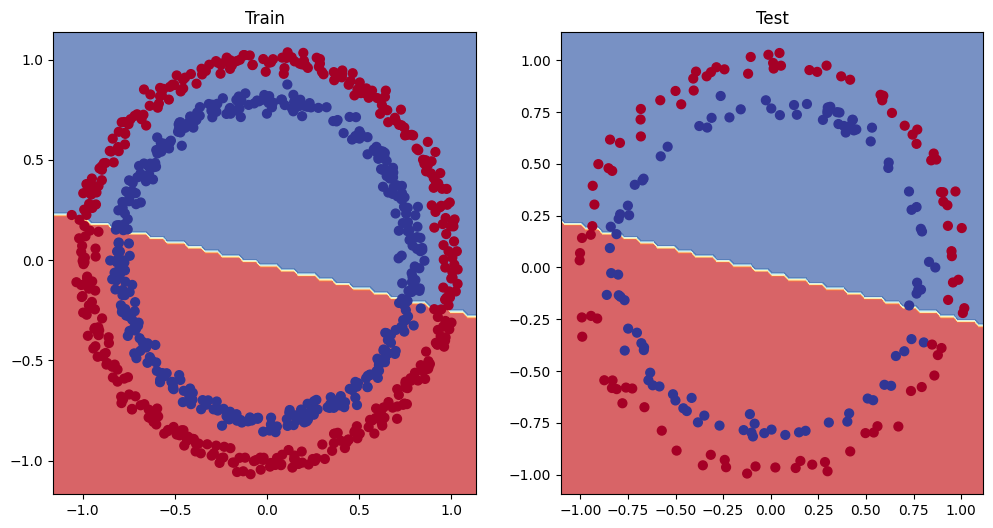

In [32]:
#  Plot decision boundary of the model
from helper_function import plot_predictions, plot_decision_boundary

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about the pattern in the data 
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer 
* Changing the activation functions 
* change the learning rate
* change the loss function 

These options are all from a model's perspective because they deal directly with the model, rather than the data

And because these options are all values we (as ML Engineer and DS) can change, they are referred as **Hyperparameter**

Lets try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers : 2 -> 3
* Increase the number of epochs: 100 -> 1000



In [33]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2,10)
        self.layer_2 = nn.Linear(10, 10)
        self.layer_3 = nn.Linear(10, 1)
        
     
    def forward(self, x):
        z = self.layer_1(x)
        z = self.layer_2(z)
        z = self.layer_3(z)
        return z


model_1 = CircleModelV1().to(device)
model_1 

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()


# Create an optimizer 
optimizer = torch.optim.SGD(params = model_1.parameters(), lr =0.1)


In [35]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# train for longer
epochs = 1000

# Put data on the target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)


for epoch in range(epochs):
    # training
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # 2. Calculate the loss/acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train, y_pred= y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # Loss Backward
    loss.backward()
    
    # 5. Optimizer
    optimizer.step()
    
    # testing
    model_1.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. calculate loss
        test_lost = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true= y_test, y_pred = test_pred)
        
    # print what happening
    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}. Test Acc: {test_acc:.2f}%")

Epoch 0 | Loss: 0.69396, Acc: 50.88% | Test Loss: 0.69602. Test Acc: 51.00%
Epoch 100 | Loss: 0.69305, Acc: 50.38% | Test Loss: 0.69602. Test Acc: 48.00%
Epoch 200 | Loss: 0.69299, Acc: 51.12% | Test Loss: 0.69602. Test Acc: 46.00%
Epoch 300 | Loss: 0.69298, Acc: 51.62% | Test Loss: 0.69602. Test Acc: 45.00%
Epoch 400 | Loss: 0.69298, Acc: 51.12% | Test Loss: 0.69602. Test Acc: 46.00%
Epoch 500 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69602. Test Acc: 46.00%
Epoch 600 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69602. Test Acc: 46.00%
Epoch 700 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69602. Test Acc: 46.00%
Epoch 800 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69602. Test Acc: 46.00%
Epoch 900 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69602. Test Acc: 46.00%


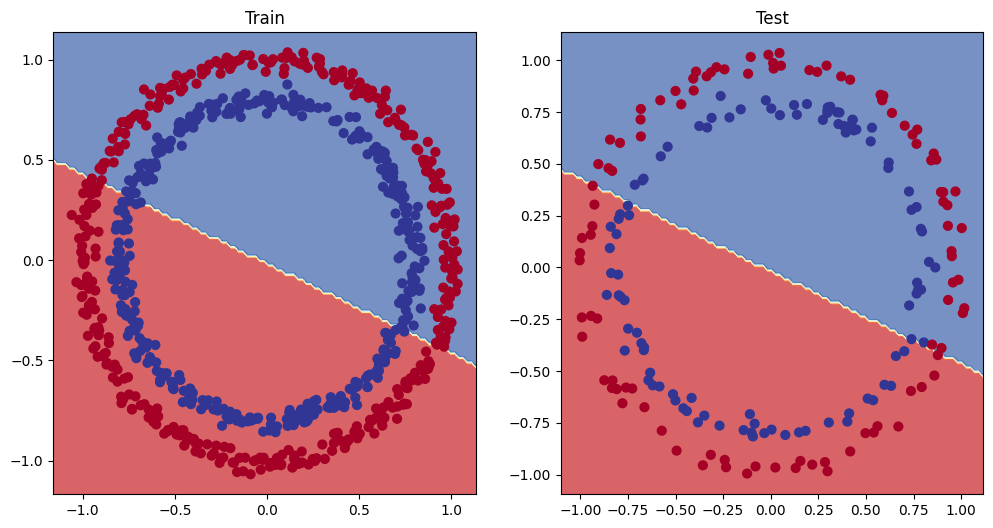

In [36]:
#  Plot decision boundary of the model
from helper_function import plot_predictions, plot_decision_boundary

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)